<a href="https://colab.research.google.com/github/Angelin/binary-classifier/blob/main/Prediction_of_cancer_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the cancer dataset
dataset = load_breast_cancer()

In [2]:
# Finding the census of types of cancer
(unique, counts) = np.unique(dataset['target'], return_counts=True)
print('Types of cancer  : ', dataset['target_names'])
print('Corresponding values for the types of cancer', unique)
print('Counts across the types of cancer:', counts)

Types of cancer  :  ['malignant' 'benign']
Corresponding values for the types of cancer [0 1]
Counts across the types of cancer: [212 357]


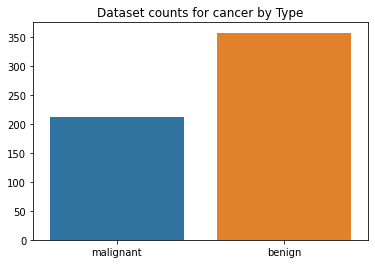

In [3]:
#Plotting the census of the cancer counts
# malignant - 0, benign - 1
seaborn.barplot(x=dataset['target_names'], y=counts)
plt.title('Dataset counts for cancer by Type')
plt.show()

In [4]:
# Collect the data into X and y.
# X - Explonatory data and y - target variable
X = dataset['data']
y = dataset['target'] 

In [5]:
# Normalizing the data for the model to learn from both features with equal magnitude.
# The data distribution is Gaussian with zero mean and unit variance 
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [6]:
# Data split as training-test 75-25 before traning the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [7]:
# Train the Logistic Regression model using the given training dataset
from sklearn.linear_model import LogisticRegression
predictiveModel = LogisticRegression()
predictiveModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# predict using the test dataset
predictions = predictiveModel.predict(X_test)

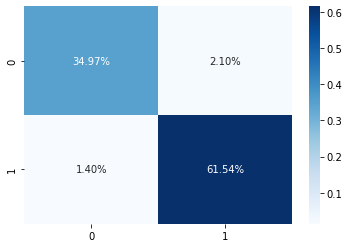

In [9]:
# calculate the performance metrics for the predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
confusionMatrix = confusion_matrix(y_test, predictions)

seaborn.heatmap(confusionMatrix/np.sum(confusionMatrix), annot=True, 
            fmt='.2%', cmap='Blues')

TN, FP, FN, TP = confusionMatrix.ravel()

In [10]:
# Accuracy will be used as supplementary to the above performance metrics
accuracy =  (TP+TN) /(TP+FP+TN+FN)
print("Accuracy of the model: {:.2f}%".format(accuracy*100))

Accuracy of the model: 96.50%


In [12]:
error_rate = (FP + FN) / (TP + FP + TN + FN) 
print("Error Rate : {:.2f}%".format(error_rate))


Accuracy of the model: 0.03%


In [15]:
recall = TP / (TP + FN)
print("Recall : {:.2f}%".format(recall*100))

Recall : 97.78%


In [16]:
precision = TP / (TP + FP)
print("Precision : {:.2f}%".format(precision*100))

Precision : 96.70%
